In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,roc_curve,roc_auc_score

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [7]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

<ipython-input-8-960f22c939fe>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.sex,palette='RdBu_r')


<Axes: xlabel='sex', ylabel='count'>

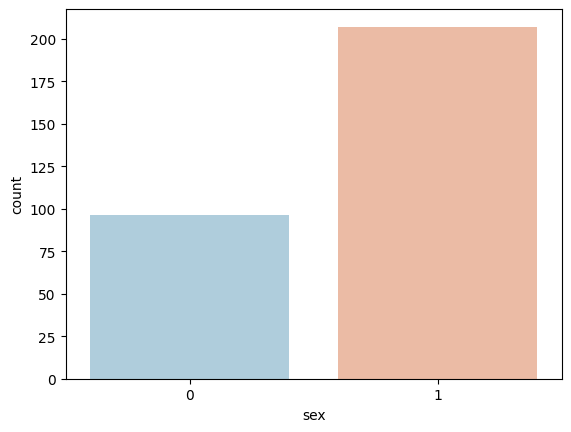

In [8]:
sns.countplot(x=df.sex,palette='RdBu_r')

<ipython-input-9-6a2d2cb53b2e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.target,palette='RdBu_r')


<Axes: xlabel='target', ylabel='count'>

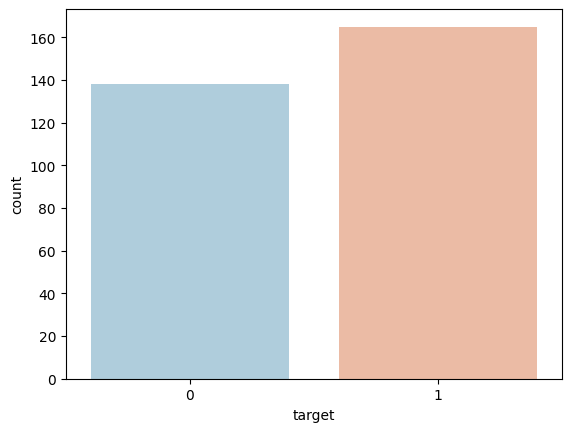

In [9]:
sns.countplot(x=df.target,palette='RdBu_r')

In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=111)


In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


# Dummy Classifier

In [16]:
from sklearn.dummy import DummyClassifier
dummy=DummyClassifier()
dummy.fit(x_train,y_train)
dummy_pred=dummy.predict(x_test)
dummy.score(x_test,y_test)

0.6557377049180327

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
log_pred=log.predict(x_test)
#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,log_pred))
print(confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))
print(f1_score(y_test,log_pred))

0.8852459016393442
[[19  2]
 [ 5 35]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        21
           1       0.95      0.88      0.91        40

    accuracy                           0.89        61
   macro avg       0.87      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61

0.9090909090909091


# Naive Bayes Classifier

In [38]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_pred=nb.predict(x_test)
#Metrics
print(accuracy_score(y_test,nb_pred))
print(confusion_matrix(y_test,nb_pred))
print(classification_report(y_test,nb_pred))
print(f1_score(y_test,nb_pred))

0.8688524590163934
[[19  2]
 [ 6 34]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        21
           1       0.94      0.85      0.89        40

    accuracy                           0.87        61
   macro avg       0.85      0.88      0.86        61
weighted avg       0.88      0.87      0.87        61

0.8947368421052632


# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=123)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
#Metrics
print(accuracy_score(y_test,dt_pred))
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
print(f1_score(y_test,dt_pred))

0.7049180327868853
[[15  6]
 [12 28]]
              precision    recall  f1-score   support

           0       0.56      0.71      0.63        21
           1       0.82      0.70      0.76        40

    accuracy                           0.70        61
   macro avg       0.69      0.71      0.69        61
weighted avg       0.73      0.70      0.71        61

0.7567567567567567


# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
#Metrics
print(accuracy_score(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
print(f1_score(y_test,rf_pred))

0.8688524590163934
[[18  3]
 [ 5 35]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.92      0.88      0.90        40

    accuracy                           0.87        61
   macro avg       0.85      0.87      0.86        61
weighted avg       0.87      0.87      0.87        61

0.8974358974358975


In [21]:
Model_acc=pd.DataFrame()

In [28]:
Model_acc=pd.DataFrame({'Models':["Dummy Classifier","Logistic Regression","Naive Bayes Classifier","Decision Tree","Random Forest Classifier"],
           'Accuracy Score':[dummy.score(x_test,y_test),accuracy_score(y_test,log_pred),accuracy_score(y_test,nb_pred),accuracy_score(y_test,dt_pred),accuracy_score(y_test,rf_pred)]})

In [29]:
Model_acc

,Models,Accuracy Score
0,Dummy Classifier,0.655738
1,Logistic Regression,0.885246
2,Naive Bayes Classifier,0.868852
3,Decision Tree,0.704918
4,Random Forest Classifier,0.836066


In [30]:
from sklearn.metrics import roc_curve,roc_auc_score

In [31]:
# AUC ROC Curve
#Logistic Regression
fpr_log,tpr_log,thres_log=roc_curve(y_test,log_pred)

#Naive Bayes
fpr_nb,tpr_nb,thres_nb=roc_curve(y_test,nb_pred)

#Decision Tree
fpr_dt,tpr_dt,thres_dt=roc_curve(y_test,dt_pred)

#Random Forest"
fpr_rf,tpr_rf,thres_rf=roc_curve(y_test,rf_pred)

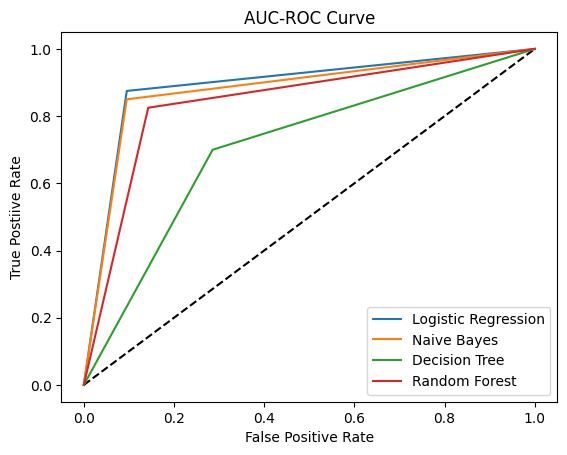

In [34]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr_log,tpr_log,label="Logistic Regression")
plt.plot(fpr_nb,tpr_nb,label="Naive Bayes")
plt.plot(fpr_dt,tpr_dt,label="Decision Tree")
plt.plot(fpr_rf,tpr_rf,label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Postiive Rate")
plt.title("AUC-ROC Curve")
plt.legend(loc="best")
plt.show()